# Convolutional Neural Networks
In diesem Codebeispiel wird das neuronale Netz aus dem vorherigen Beispiel um Convolutions erweitert. Statistische Abhängigkeiten zwischen Bildern können mit dieser Technik modelliert werden.

Analog zu dem biologischen Konzept von rezeptiven Feldern werden in CNNs mehrere Bildpunkte auf einmal betrachtet. 3x3 Pixel Filtermatrizen werden über das zu verarbeitende Bild geschoben und mit jedem 3x3-Bildbereich verrechnet (siehe Abbildung).

![Convolutions](https://upload.wikimedia.org/wikipedia/commons/4/4f/3D_Convolution_Animation.gif)

## Programmbibliotheken einbinden
Wie gewohnt werden alle benötigten Module und Klassen importiert.

In [1]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


## MNIST-Datensatz laden
Der bekannte MNIST handwritten digits Datensatz wird von `keras.datasets` geladen.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Datensatz vorverarbeiten
Im ersten Praxisblock wurde das zu verarbeitende Bild für den Input in das Netz durch den _Flatten_-Operator in einen 784-dimensionalen Vektor verwandelt. Bei der Bildverarbeitung mit CNNs geschieht dies nicht, da die Pixel für die Verrechnung mit den Filtermatrizen in ihrer ursprünglichen Anordnung vorliegen müssen.

In [3]:
# Festlegen der Anzahl möglicher Labels
num_classes = 10

# Festlegen der Anzahl für das Training genutzter Bilder
num_train_images = 2000

In [4]:
# Umwandeln der Bilddaten in 28x28x1 Pixel (1-Kanal Graustufe)
x_train = x_train[0:num_train_images].reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalisierung der Werte von 0 bis 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Konvertieren der Labels in das One-Hot Format
y_train = keras.utils.to_categorical(y_train, num_classes)[0:num_train_images]
y_test = keras.utils.to_categorical(y_test, num_classes)

2000 train samples
10000 test samples


## Modellarchitektur

In [35]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [36]:
model.reset_states() 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Modell trainieren

In [37]:
training_history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test[0:500], y_test[0:500]))

Train on 2000 samples, validate on 500 samples
Epoch 1/10
2000/2000 [==============================] - 16s 8ms/step - loss: 0.8109 - acc: 0.7435 - val_loss: 0.3155 - val_acc: 0.8980
Epoch 2/10
2000/2000 [==============================] - 16s 8ms/step - loss: 0.1976 - acc: 0.9445 - val_loss: 0.1567 - val_acc: 0.9440
Epoch 3/10
2000/2000 [==============================] - 18s 9ms/step - loss: 0.0966 - acc: 0.9720 - val_loss: 0.1969 - val_acc: 0.9380
Epoch 4/10
2000/2000 [==============================] - 18s 9ms/step - loss: 0.0648 - acc: 0.9795 - val_loss: 0.1066 - val_acc: 0.9640
Epoch 5/10
2000/2000 [==============================] - 15s 8ms/step - loss: 0.0262 - acc: 0.9920 - val_loss: 0.1499 - val_acc: 0.9420
Epoch 6/10
2000/2000 [==============================] - 16s 8ms/step - loss: 0.0130 - acc: 0.9970 - val_loss: 0.1048 - val_acc: 0.9660
Epoch 7/10
2000/2000 [==============================] - 20s 10ms/step - loss: 0.0137 - acc: 0.9965 - val_loss: 0.1583 - val_acc: 0.9400
Epoch 8

## Modell evaluieren
Wie bereits in dem ersten Beispiel kann die Qualität des trainierten Modells mithilfe des Test-Datensatzes und den Kurven der Loss-Entwicklung beurteilt werden.

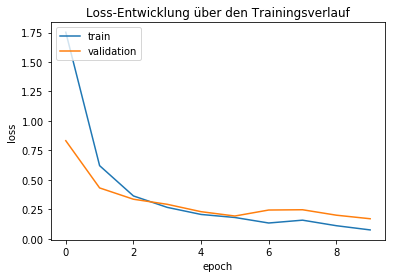

In [33]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Loss-Entwicklung über den Trainingsverlauf')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 428us/step


[0.19811266534477473, 0.9403]

## Weiterführende Links

[3D visualization of a CNN](http://scs.ryerson.ca/~aharley/vis/conv/): Die Fakultät Computer Science der Universität Ryerson, Kanada hat eine interaktive 3D-Visualisierung entwickelt, um die Funktionsweise von Convolutional Neural Networks nachvollziehbar zu machen.

[The Building Blocks of Interpretability](https://distill.pub/2018/building-blocks/) ist eine anschauliche Visualisierung, die zeigt, welche Muster CNNs lernen und wie diese Muster interpretierbar gemacht werden können.

[Google Colab: Fashion MNIST](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb): Das in dieser Aufgabe gelöste MNIST-Beispiel gilt teilweise als abgegriffen und mit heutigen Technologien zu einfach lösbar. Fashion-MNIST ist ein Datensatz zur Klassifizierung von Kleidungsstücken. Das Notebook hierzu läuft auf Google Colab, einer von Google bereitgestellten Jupyter Notebook Umgebung mit kostenlosen GPU-Instanzen.

[Seedbank](https://research.google.com/seedbank/seeds?keyword=mlbasics) ist eine Sammlung von interaktiven Jupyter-Notebooks zu den unterschiedlichsten ML- und Deep-Learning-Themen. Alle Notebooks laufen auf Google Colab, weshalb auch hier ein Google Account notwendig ist.